# OLA ENSEMBLE BUSINESS CASE



#PROBLEM STATEMENT

**Being provided with the monthly information for a segment of drivers for 2019 and 2020, the task is to predict whether a driver will be leaving the company or not based on their attributes which are most relevant for predicting driver attrition and choosing an appropriate machine learning algorithm to create a predictive model and determining suitable evaluation metrics to assess the model’s performance and understanding the model’s decision-making process.**


#DOWNLOADING DATASET & IMPORTING LIBRARIES

In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv


--2025-03-03 07:03:02--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.167.84.28, 3.167.84.148, 3.167.84.196, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.167.84.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola_driver_scaler.csv’

ola_driver_scaler.c 100%[===================>]   1.08M  --.-KB/s    in 0.03s   

2025-03-03 07:03:02 (34.8 MB/s) - ‘ola_driver_scaler.csv’ saved [1127673/1127673]



In [2]:
import numpy as np
import pandas as pd
import regex
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE


In [3]:
df = pd.read_csv('ola_driver_scaler.csv')
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


#EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(19104, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
pd.set_option('display.max_columns', None)
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [8]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [10]:
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


**There are 61 nulls in Age, 52 nulls in Gender and 17488 nulls in LastWorkingDate columns.**

In [11]:
df.nunique()

,0
MMM-YY,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493
Joining Designation,5


In [12]:
df.duplicated().value_counts()

,count
False,19104


**There are no duplicate values in the dataset.**

In [13]:
# converting date time columns to pandas date time

df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


#FEATURE ENGINEERING

In [14]:
# creating a deep copy of the dataset

df1 = df.copy(deep=True)

In [15]:
# encoding of target variable wrt the driver ID

first = df1.groupby('Driver_ID')['LastWorkingDate'].last().reset_index()
first['target'] = first['LastWorkingDate'].isna().astype(int)
first.head()



,Driver_ID,LastWorkingDate,target
0,1,2019-03-11,0
1,2,NaT,1
2,4,2020-04-27,0
3,5,2019-03-07,0
4,6,NaT,1


In [16]:
# checking the drivers for whom the quarterly ratings have increased

QR1 = df1.groupby('Driver_ID')['Quarterly Rating'].first().reset_index()
QR2 = df1.groupby('Driver_ID')['Quarterly Rating'].last().reset_index()


In [17]:
QR1.head(), QR2.head()

(   Driver_ID  Quarterly Rating
 0          1                 2
 1          2                 1
 2          4                 1
 3          5                 1
 4          6                 1,
    Driver_ID  Quarterly Rating
 0          1                 2
 1          2                 1
 2          4                 1
 3          5                 1
 4          6                 2)

In [18]:
# merging QR1 and QR2 to the dataframe

first = first.merge(QR1,on='Driver_ID')
first = first.merge(QR2,on='Driver_ID')
first.head()

,Driver_ID,LastWorkingDate,target,Quarterly Rating_x,Quarterly Rating_y
0,1,2019-03-11,0,2,2
1,2,NaT,1,1,1
2,4,2020-04-27,0,1,1
3,5,2019-03-07,0,1,1
4,6,NaT,1,1,2


In [19]:
# creating column for driver ID whose QR has increased

first['QR_Growth'] = np.where(first['Quarterly Rating_x'] == first['Quarterly Rating_y'], 0,1)
first.head()

,Driver_ID,LastWorkingDate,target,Quarterly Rating_x,Quarterly Rating_y,QR_Growth
0,1,2019-03-11,0,2,2,0
1,2,NaT,1,1,1,0
2,4,2020-04-27,0,1,1,0
3,5,2019-03-07,0,1,1,0
4,6,NaT,1,1,2,1


In [20]:
# checking the driver ID whose income has increased

income1= df1.groupby('Driver_ID')['Income'].first().reset_index()
income2 = df1.groupby('Driver_ID')['Income'].last().reset_index()


In [21]:
income1.head(),  income2.head()

(   Driver_ID  Income
 0          1   57387
 1          2   67016
 2          4   65603
 3          5   46368
 4          6   78728,
    Driver_ID  Income
 0          1   57387
 1          2   67016
 2          4   65603
 3          5   46368
 4          6   78728)

In [22]:
# merging the income column to the database

first = first.merge(income1, on='Driver_ID')
first = first.merge(income2, on='Driver_ID')
first.head()

,Driver_ID,LastWorkingDate,target,Quarterly Rating_x,Quarterly Rating_y,QR_Growth,Income_x,Income_y
0,1,2019-03-11,0,2,2,0,57387,57387
1,2,NaT,1,1,1,0,67016,67016
2,4,2020-04-27,0,1,1,0,65603,65603
3,5,2019-03-07,0,1,1,0,46368,46368
4,6,NaT,1,1,2,1,78728,78728


In [23]:
# creating column to check for income of driver ID if increased

first['Income_Growth'] = np.where(first['Income_x'] == first['Income_y'], 0,1)
first.head()

,Driver_ID,LastWorkingDate,target,Quarterly Rating_x,Quarterly Rating_y,QR_Growth,Income_x,Income_y,Income_Growth
0,1,2019-03-11,0,2,2,0,57387,57387,0
1,2,NaT,1,1,1,0,67016,67016,0
2,4,2020-04-27,0,1,1,0,65603,65603,0
3,5,2019-03-07,0,1,1,0,46368,46368,0
4,6,NaT,1,1,2,1,78728,78728,0


In [24]:
# number of Driver ID whose Quarterly Rating has increased

first['QR_Growth'].value_counts()

,count
QR_Growth,
0,1565
1,816


In [25]:
# number of Driver ID whose Income has increased

first['Income_Growth'].value_counts()

,count
Income_Growth,
0,2338
1,43


**There are 816 drivers whose Quarterly Rating has increased.**

**There are only 43 drivers whose income has increased.**

In [26]:
first = first[['Driver_ID','target','QR_Growth','Income_Growth']]
first.head()

,Driver_ID,target,QR_Growth,Income_Growth
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,1,0


In [27]:
agg_func = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'first'}
df1 = df1.groupby([df1['Driver_ID']]).aggregate(agg_func)
df1.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating
Driver_ID,,,,,,,,,,,,,
1,3,1,28.0,0.0,C23,2,2018-12-24,2019-03-11,1,1715580,172161,1,2
2,2,2,31.0,0.0,C7,2,2020-11-06,NaT,2,0,134032,2,1
4,5,4,43.0,0.0,C13,2,2019-12-07,2020-04-27,2,350000,328015,2,1
5,3,5,29.0,0.0,C9,0,2019-01-09,2019-03-07,1,120360,139104,1,1
6,5,6,31.0,1.0,C11,1,2020-07-31,NaT,3,1265000,393640,3,1


In [28]:
# merging first dataframe with df1 dataframe

df1.reset_index(drop=True, inplace=True)
df1 = df1.merge(first,on='Driver_ID')
df1.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,target,QR_Growth,Income_Growth
0,3,1,28.0,0.0,C23,2,2018-12-24,2019-03-11,1,1715580,172161,1,2,0,0,0
1,2,2,31.0,0.0,C7,2,2020-11-06,NaT,2,0,134032,2,1,1,0,0
2,5,4,43.0,0.0,C13,2,2019-12-07,2020-04-27,2,350000,328015,2,1,0,0,0
3,3,5,29.0,0.0,C9,0,2019-01-09,2019-03-07,1,120360,139104,1,1,0,0,0
4,5,6,31.0,1.0,C11,1,2020-07-31,NaT,3,1265000,393640,3,1,1,1,0


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   int64         
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   Grade                 2381 non-null   int64         
 9   Total Business Value  2381 non-null   int64         
 10  Income                2381 non-null   int64         
 11  Joining Designation   2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  target            

In [30]:
# extracting month and year from Dateofjoining column

df1['joining_month'] = pd.to_datetime(df1['Dateofjoining']).dt.month
df1['joining_year'] = pd.to_datetime(df1['Dateofjoining']).dt.year


In [31]:
# renaming MMM-Y column to Monthly_Reporting

df1.rename(columns={'MMM-YY':'Monthly_Reporting'},inplace=True)

In [32]:
# converting datatype of age to int

df1['Age'] = df1['Age'].astype('int64')

# ENCODING OF CATEGORICAL COLUMNS

In [33]:
# encoding gender into integers

df1['Gender'].replace({'M':0, 'F':1}, inplace= True)
df1['Gender']= df1['Gender'].astype('int64')

df1['Gender'].head()

,Gender
0,0
1,0
2,0
3,0
4,1


In [34]:
# target encoding the city column

city_agg = df1.groupby('City')['target'].mean()

df1['City'] = df1['City'].map(city_agg)
df1['City'].head()

,City
0,0.229730
1,0.315789
2,0.183099
3,0.293333
4,0.296875


In [35]:
# dropping columns

df1.drop(columns=['Dateofjoining','LastWorkingDate'],axis=1,inplace=True)
pd.set_option('display.max_columns', None)
df1.head()


,Monthly_Reporting,Driver_ID,Age,Gender,City,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,target,QR_Growth,Income_Growth,joining_month,joining_year
0,3,1,28,0,0.229730,2,1,1715580,172161,1,2,0,0,0,12,2018
1,2,2,31,0,0.315789,2,2,0,134032,2,1,1,0,0,11,2020
2,5,4,43,0,0.183099,2,2,350000,328015,2,1,0,0,0,12,2019
3,3,5,29,0,0.293333,0,1,120360,139104,1,1,0,0,0,1,2019
4,5,6,31,1,0.296875,1,3,1265000,393640,3,1,1,1,0,7,2020


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Monthly_Reporting     2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   int64  
 3   Gender                2381 non-null   int64  
 4   City                  2381 non-null   float64
 5   Education_Level       2381 non-null   int64  
 6   Grade                 2381 non-null   int64  
 7   Total Business Value  2381 non-null   int64  
 8   Income                2381 non-null   int64  
 9   Joining Designation   2381 non-null   int64  
 10  Quarterly Rating      2381 non-null   int64  
 11  target                2381 non-null   int64  
 12  QR_Growth             2381 non-null   int64  
 13  Income_Growth         2381 non-null   int64  
 14  joining_month         2381 non-null   int32  
 15  joining_year         

In [37]:
df1.isnull().sum()

,0
Monthly_Reporting,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Grade,0
Total Business Value,0
Income,0
Joining Designation,0


**Now the dataset doesn't contains any nulls and all the columns have numerical values.**

#UNI-VARIATE ANALYSIS

In [38]:
df1['target'].value_counts()

,count
target,
0,1616
1,765


In [39]:
df1['Grade'].value_counts()

,count
Grade,
2,855
1,741
3,623
4,138
5,24


In [40]:
df1['City'].value_counts()

,count
City,
0.269737,152
0.316832,101
0.468750,96
0.301075,93
0.404494,89
0.325843,89
0.290698,86
0.404762,84
0.390244,82


In [41]:
df1['Gender'].value_counts()

,count
Gender,
0,1404
1,977


In [42]:
df1['Quarterly Rating'].value_counts()

,count
Quarterly Rating,
1,1649
2,411
3,216
4,105


In [43]:
df1['Joining Designation'].value_counts()

,count
Joining Designation,
1,1026
2,815
3,493
4,36
5,11


In [44]:
df1['Education_Level'].value_counts()

,count
Education_Level,
2,802
1,795
0,784


In [45]:
df1['joining_month'].value_counts()

,count
joining_month,
7,296
5,276
10,269
11,253
6,230
8,224
9,222
12,210
1,164


In [46]:
df1['joining_year'].value_counts()

,count
joining_year,
2020,818
2018,599
2019,591
2015,109
2016,108
2017,86
2013,41
2014,29


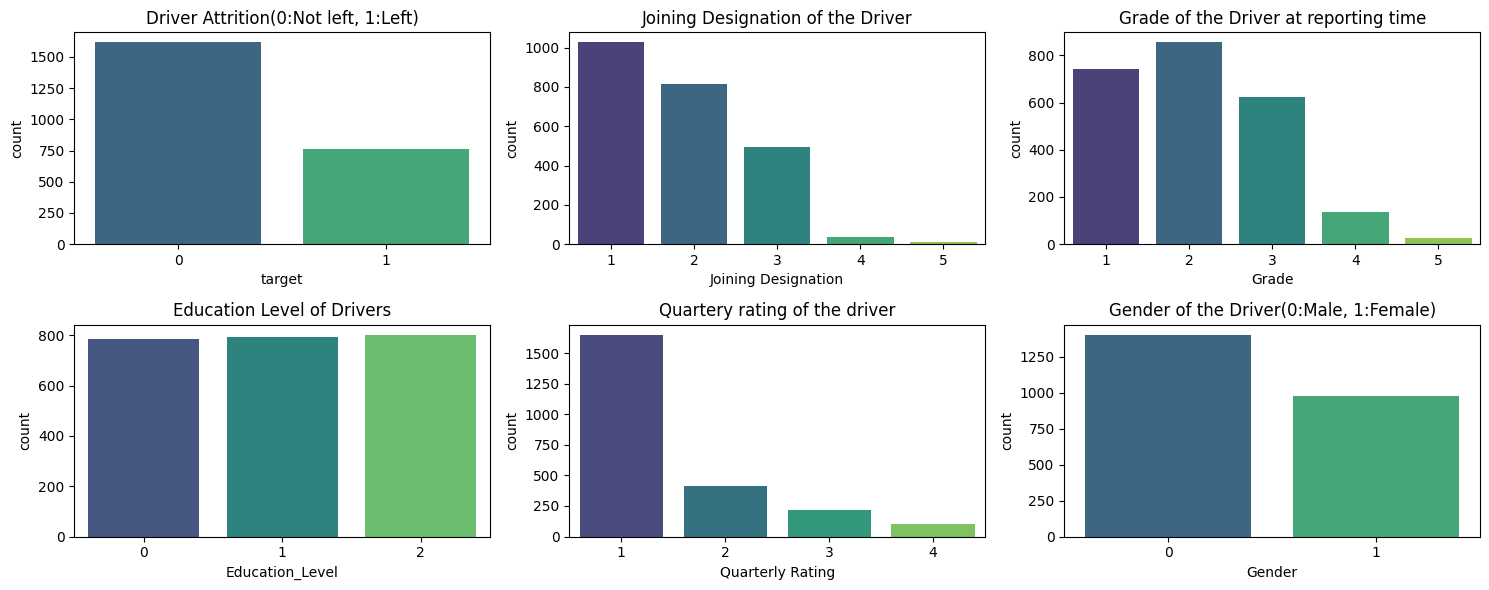

In [47]:
# distributions of categorical features

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(2,3,1)
sns.countplot(x=df1.target,palette='viridis')
plt.title('Driver Attrition(0:Not left, 1:Left)')

ax = fig.add_subplot(2,3,2)
sns.countplot(x=df1['Joining Designation'],palette='viridis')
plt.title('Joining Designation of the Driver')

ax = fig.add_subplot(2,3,3)
sns.countplot(x=df1.Grade,palette='viridis')
plt.title('Grade of the Driver at reporting time')

ax = fig.add_subplot(2,3,4)
sns.countplot(x=df1.Education_Level,palette='viridis')
plt.title('Education Level of Drivers')


ax = fig.add_subplot(2,3,5)
sns.countplot(x=df1['Quarterly Rating'],palette='viridis')
plt.title('Quartery rating of the driver')

ax = fig.add_subplot(2,3,6)
sns.countplot(x=df1.Gender,palette='viridis')
plt.title('Gender of the Driver(0:Male, 1:Female)')


plt.tight_layout()
plt.show()




**Number of drivers leaving the company is almost half the number of drivers not leaving the company.**

**Maximum drivers have designation 1 at the time of joining.**

**Mostly the drivers have a Grade 2 at the time of reporting.**

**The education level of all the three categories of drivers, i.e., 0 for 10+ ,1 for 12+ ,2 for graduate, is almost equal.**

**The maximum quarterly rating of drivers is 1.**

**The dominating gender of drivers is Male.**

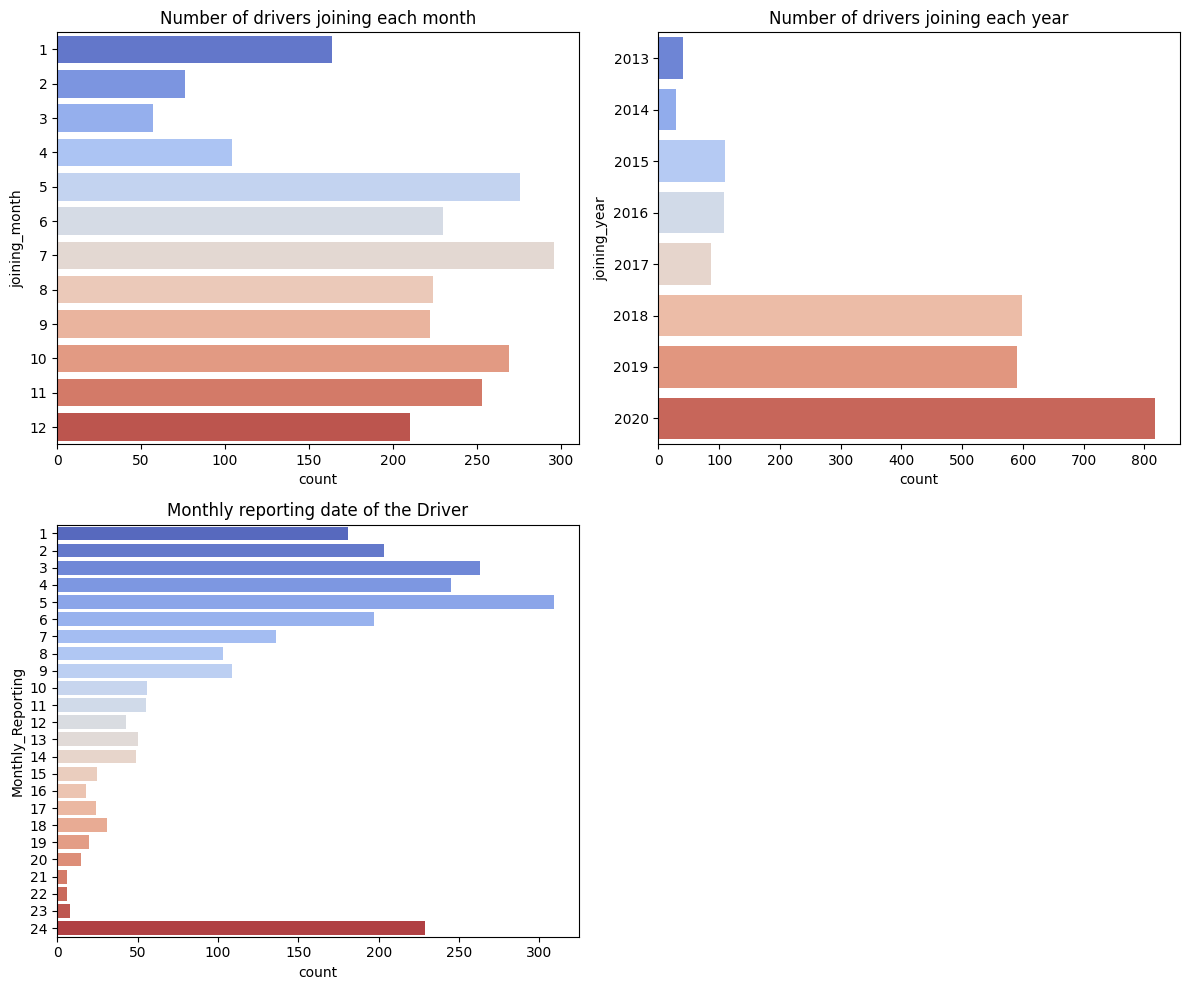

In [48]:
# distribution of joining_month, joining_year, city and monthly_reporting

fig = plt.figure(figsize=(12,10))


ax = fig.add_subplot(2,2,1)
sns.countplot(y=df1.joining_month,palette='coolwarm')
plt.title('Number of drivers joining each month')

ax = fig.add_subplot(2,2,2)
sns.countplot(y=df1.joining_year,palette='coolwarm')
plt.title('Number of drivers joining each year')

ax = fig.add_subplot(2,2,3)
sns.countplot(y=df1.Monthly_Reporting,palette='coolwarm')
plt.title('Monthly reporting date of the Driver')

plt.tight_layout()

**maximum number of drivers joining is in the mid-year as compared to year ending and beginning.**

**More drivers are joining the company with increase in year.**

**The monthly reportings of most of the drivers are around 1 to 5.**

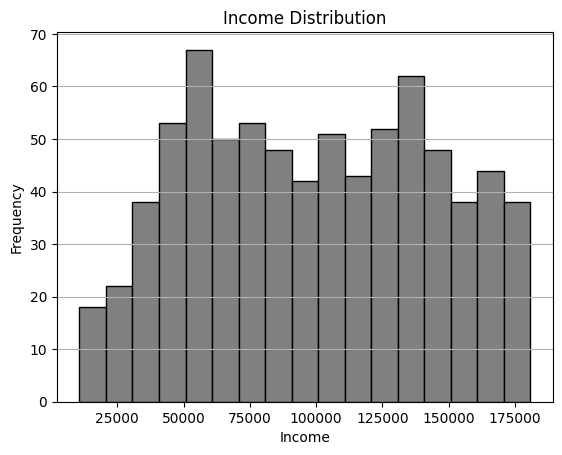

In [49]:
# distribution of Income

bin_edges = np.arange(10747, 188418, 10000)
plt.hist(df1['Income'], bins=bin_edges, color='gray', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.grid(axis='y')
plt.show()


**The median salary of the drivers is around 2,27,000.**

**Most of the drivers have the salary around 50,000.**

# MULTI VARIATE ANALYSIS

In [50]:
corr= df1.corr()

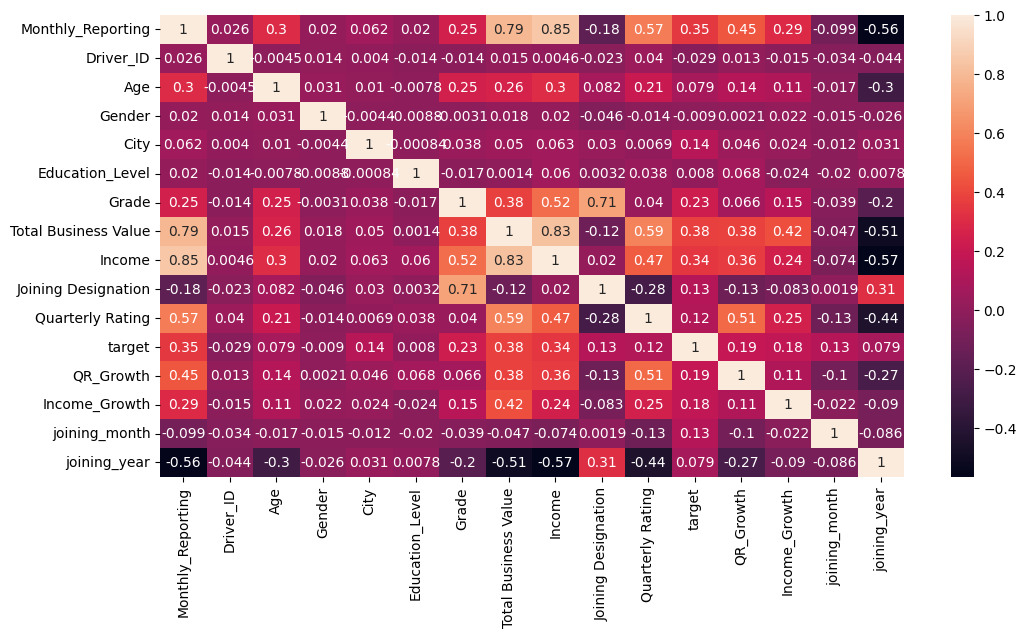

In [51]:
# heat map for correlation

plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.show()

**The target is directly related to Total Business value, Income and Monthly Reportings.**

**Monthly Reportings are very highly correlated with Income and Total Business Value and Quarterly rating.**

**Grade and Joining Destination are also very highly correlated.**

In [52]:
gender_group = df1.groupby('Gender')['Income'].sum().reset_index()
education_group = df1.groupby('Education_Level')['Income'].sum().reset_index()
grade_group = df1.groupby('Grade')['Income'].sum().reset_index()
Designation_group = df1.groupby('Joining Designation')['Income'].sum().reset_index()
QR_Growth_group = df1.groupby('QR_Growth')['Income'].sum().reset_index()
target_group = df1.groupby('target')['Income'].sum().reset_index()
Income_Growth_group = df1.groupby('Income_Growth')['Income'].sum().reset_index()

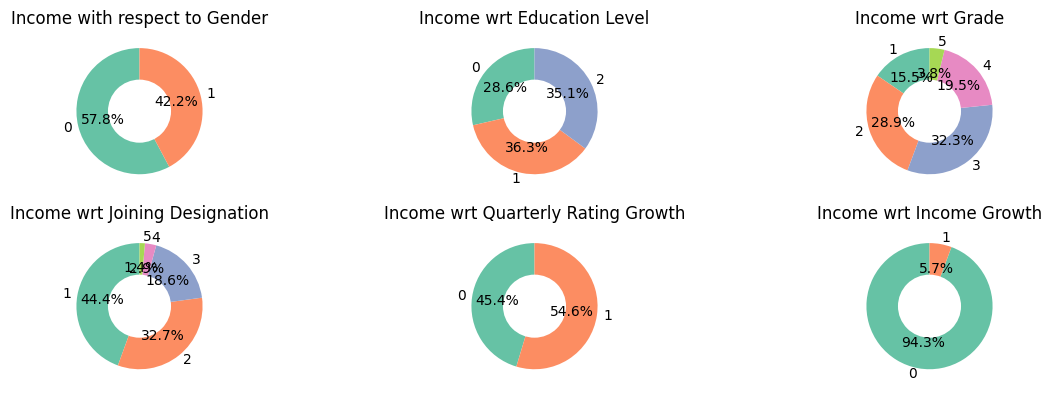

In [53]:
# Income of the driver with respect to gender, education_level , grade, designation, Quarterly rating and Revenue_Growth

plt.figure(figsize=(12,6))

plt.subplot(3,3,1)
plt.pie(gender_group['Income'], labels=gender_group ['Gender'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Gender')
plt.subplot(3,3,2)
plt.pie(education_group['Income'], labels=education_group['Education_Level'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income wrt Education Level')
plt.subplot(3,3,3)
plt.pie(grade_group['Income'], labels=grade_group['Grade'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income wrt Grade')
plt.subplot(3,3,4)
plt.pie(Designation_group['Income'], labels= Designation_group['Joining Designation'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income wrt Joining Designation')
plt.subplot(3,3,5)
plt.pie(QR_Growth_group['Income'], labels= QR_Growth_group['QR_Growth'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income wrt Quarterly Rating Growth')
plt.subplot(3,3,6)
plt.pie(Income_Growth_group['Income'], labels=Income_Growth_group['Income_Growth'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income wrt Income Growth')


plt.tight_layout()
plt.show()



**The income of Males is slighly greater than Females.**

**The income with respect to Education Level is roughly equal.**

**Drivers having Grade 3 earn the most.**

**Income of drivers having Joining Destination as 1 is maximum.**

**Drivers whose Quarterly Rating increases earn more than drivers whose ratings dont increase.**

**Around 2% of the drivers get growth in the annual Income.**

# OUTLIER DETECTION & HANDLING

Text(0.5, 1.0, 'Outliers in Total Business Value column')

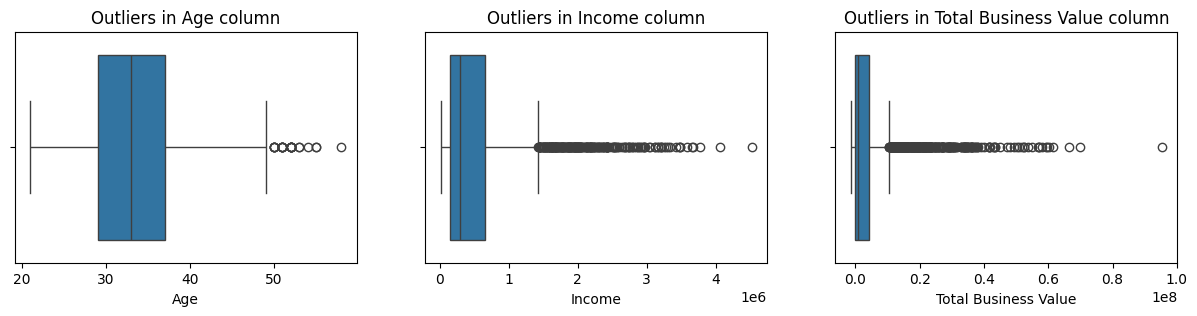

In [54]:
# boxplot for numerical values

fig= plt.figure(figsize=(15,3))

ax = fig.add_subplot(1,3,1)
sns.boxplot(x=df1.Age)
plt.title('Outliers in Age column')

ax = fig.add_subplot(1,3,2)
sns.boxplot(x=df1.Income)
plt.title('Outliers in Income column')

ax = fig.add_subplot(1,3,3)
sns.boxplot(x=df1['Total Business Value'])
plt.title('Outliers in Total Business Value column')


**There are many outliers in all the three columns, and we need to remove them.**

In [55]:
# handling outliers with IQR method

columns= ['Age', 'Income', 'Total Business Value']

for i in columns:
  Q1 = df1[i].quantile(0.25)
  Q3 = df1[i].quantile(0.75)

# Calculate the IQR
  IQR = Q3 - Q1

# Define upper and lower fences
  lower_fence = Q1 - 1.5 * IQR
  upper_fence = Q3 + 1.5 * IQR

# Filter rows within the IQR
  df1 = df1[(df1[i] >= lower_fence) & (df1[i] <= upper_fence)]


Text(0.5, 1.0, 'Outliers in Total Business Value column')

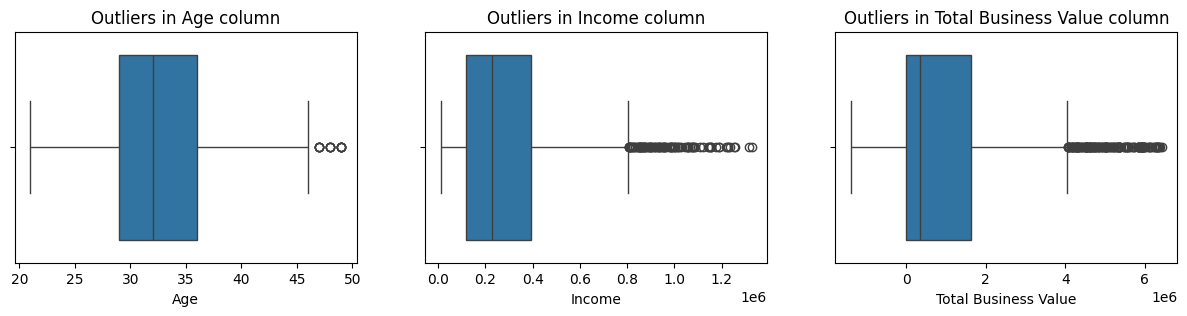

In [56]:
# checking outliers after removing them

fig= plt.figure(figsize=(15,3))

ax = fig.add_subplot(1,3,1)
sns.boxplot(x=df1.Age)
plt.title('Outliers in Age column')

ax = fig.add_subplot(1,3,2)
sns.boxplot(x=df1.Income)
plt.title('Outliers in Income column')

ax = fig.add_subplot(1,3,3)
sns.boxplot(x=df1['Total Business Value'])
plt.title('Outliers in Total Business Value column')


**After performing IQR, outliers are removed to a great extent.**

# ENSEMBLE MODELS

**Precision: Precision measures how often the model correctly predicts the positive class (here, drivers who leave the company). A high precision means that when the model predicts a driver will leave, it is usually accurate. However, high precision doesn’t guarantee that all actual attrition cases are identified. If minimizing false positives (avoiding unnecessary alarms) is critical, we prioritize precision.**

**Recall (Sensitivity): Recall assesses the model’s ability to find all the actual positive cases (i.e., drivers who left). High recall means that the model captures most of the attrition cases, but it may also generate false positives (predicting attrition when it’s not actually happening). If capturing as many actual attrition cases as possible is crucial (here, preventing driver loss), we prioritize recall.**

**SPLITTING THE DATA INTO TRAIN AND TEST**

In [57]:
X= df1.drop('target', axis=1)
y = df1['target']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state= 20)

**STANDARDIZING THE DATA**

In [58]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.230596  , -1.51722193, -0.31482887, ...,  0.        ,
         1.439794  , -0.76838719],
       [-1.27372125, -0.64697625, -0.12942016, ...,  0.        ,
         0.80544998, -0.76838719],
       [ 0.53145945, -1.50970902, -1.24187242, ...,  0.        ,
         1.12262199,  0.04778928],
       ...,
       [-0.67199435, -1.24800924,  0.42680597, ...,  0.        ,
        -2.04909813,  0.86396575],
       [-0.07026745, -0.88363299,  1.53925823, ...,  0.        ,
         0.80544998, -0.76838719],
       [ 0.8323229 ,  0.78172923,  0.79762339, ...,  0.        ,
        -0.78041008, -0.76838719]])

**COMPARING THE MEANS OF VARIOUS CLASSIFIER ALGORITHMS**

In [59]:
# Logistic regression sscore

LG_score = cross_val_score(LogisticRegression(), X,y, cv=5)
LG_score.mean()


0.7431578947368422

In [60]:
# decision tree score

DT_score = cross_val_score(DecisionTreeClassifier(),X,y, cv=5)
DT_score.mean()

0.8878947368421054

In [61]:
# random forest score

RF_score = cross_val_score(RandomForestClassifier(),X,y, cv=5)
RF_score.mean()

0.9

In [62]:
# gradient boosting score

GB_score = cross_val_score(GradientBoostingClassifier(),X,y, cv=5)
GB_score.mean()

0.9047368421052632

In [63]:
# XG boost score

XGB_score = cross_val_score(XGBClassifier(),X,y, cv=5)
XGB_score.mean()

0.9126315789473685

**The maximum score is given by XG Boost classifier.**

**Scores of Random Forest and Gradient Boosting are also acceptable.**

# MODEL CREATION AND COMPARISON

**RANDOM FOREST CLASSIFIER**

In [64]:
# tuning the classifier to get the best parameters

rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators':list(range(10,20)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
 }

clf = GridSearchCV(rf_model,param_grid,cv=10,scoring='recall')
clf.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19]},
             scoring='recall')

In [65]:
# getting the best parameters for the classifier

clf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 13}

**Model Creation**

In [66]:
# initializing a random forest classifier

rf_clf = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='sqrt',n_estimators=10)
rf_clf.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=10)

In [67]:
# predicting the model on train and test data

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

In [68]:
print(f'Train Accuracy: {accuracy_score(y_pred_train, y_train)}')
print(f'Test Accuracy: {accuracy_score(y_pred_test, y_test)}')

Train Accuracy: 0.9697368421052631
Test Accuracy: 0.9131578947368421


**The Train accuracy of the Random Forest Classifier is around 95% and the test accuracy is around 91%.**

**Feature importance for RF Classifier**

In [69]:
# Calculating Feature Importance

for score, name in zip(rf_clf.feature_importances_, X_train.columns):
  print(round(score,2),name)

0.11 Monthly_Reporting
0.04 Driver_ID
0.04 Age
0.01 Gender
0.04 City
0.01 Education_Level
0.02 Grade
0.1 Total Business Value
0.08 Income
0.05 Joining Designation
0.02 Quarterly Rating
0.03 QR_Growth
0.0 Income_Growth
0.11 joining_month
0.34 joining_year


**The most important fetaure is joining_year followed by joining_month, Monthly_Reporting Total_Business_value and Income.**

**ROC-AUC Curve for Random Forest Classifier**

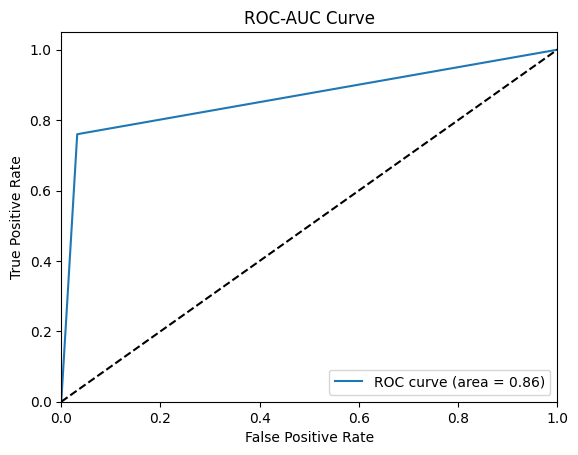

In [70]:
# Calculating ROC AUC score

roc_auc = roc_auc_score(y_test, y_pred_test)

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()


**An AUC of 0.85 indicates good predictive performance.**

**The model achieves a high TPR while keeping the FPR relatively low.**

**Confusion Matrix for RF Classifier**

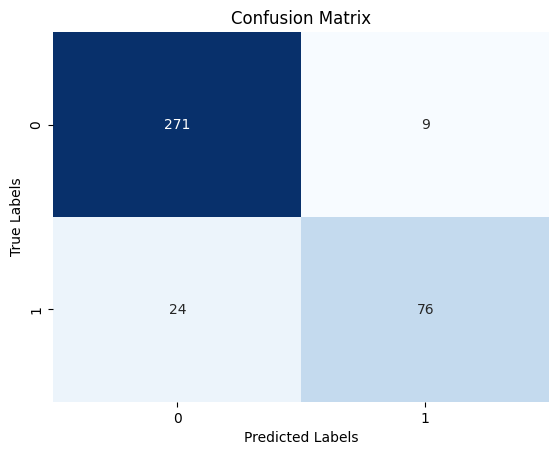


 CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       280
           1       0.89      0.76      0.82       100

    accuracy                           0.91       380
   macro avg       0.91      0.86      0.88       380
weighted avg       0.91      0.91      0.91       380



In [71]:
# plotting confusion matrix for Random forest classifier

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred_test))


**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 91% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 97% were correctly predicted as class 0.

F1-Score: 0.94

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 91% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 73% were correctly predicted as class 1.

F1-Score: 0.81


**The model performs well in predicting drivers who stayed (class 0) with high precision and recall.**

**However, for drivers who left (class 1), recall is lower, indicating that some attrition cases are missed.**

**GRADIENT BOOSTING CLASSIFIER**

**Tuning Parameters for GB Classifier**

In [72]:
gb= GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(gb, param_grid, cv=10, scoring='recall')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='recall')

In [73]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}

**Model Creation**

In [74]:
# creating GB Classifier

gb_clf = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 50, subsample= 0.9)

gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=50, subsample=0.9)

In [75]:
# predicting model on train and test data

y_pred_train = gb_clf.predict(X_train)
y_pred_test =gb_clf.predict(X_test)

In [76]:
# checking scores for train and test data

print(f'Train Accuracy: {accuracy_score(y_pred_train, y_train)}')
print(f'Test Accuracy: {accuracy_score(y_pred_test, y_test)}')


Train Accuracy: 0.95
Test Accuracy: 0.9263157894736842


**The Training accuracy is around 95% and the testing accuracy is around 92.3%, which is a bit more than the Random Forest Classifier.**

**Feature Importance for Gradient Boosting classifier**

In [77]:
# feature importance for GB classifier

for score, name in zip(gb_clf.feature_importances_, X_train.columns):
  print(round(score,2),name)

0.08 Monthly_Reporting
0.01 Driver_ID
0.0 Age
0.0 Gender
0.01 City
0.0 Education_Level
0.0 Grade
0.17 Total Business Value
0.01 Income
0.0 Joining Designation
0.01 Quarterly Rating
0.0 QR_Growth
0.0 Income_Growth
0.26 joining_month
0.45 joining_year


**The feature importance of most of the features is 0.**

**Apart from that, the features which are important are Joining month, joining year, Total_Business_Value and Monthly_Reporting.**


**ROC-AUC Curve for Gradient Boosting Classifier**

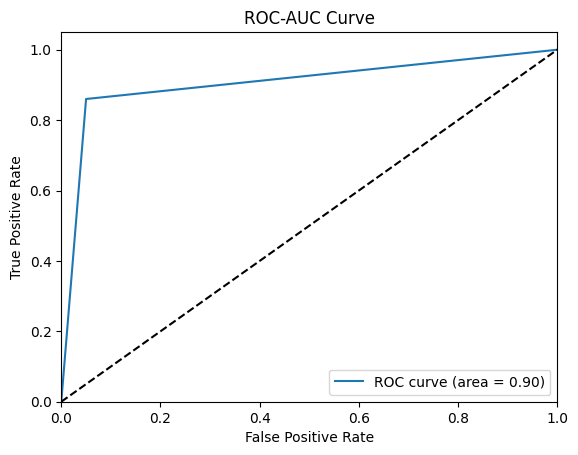

In [78]:
# Calculating ROC AUC score

roc_auc = roc_auc_score(y_test, y_pred_test)

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()


**The AUC for Gradient Boosting is around 0.90, which is quite a good amount of area under the curve.**

**Confusion Matrix for Gradient Boosting Classifier**

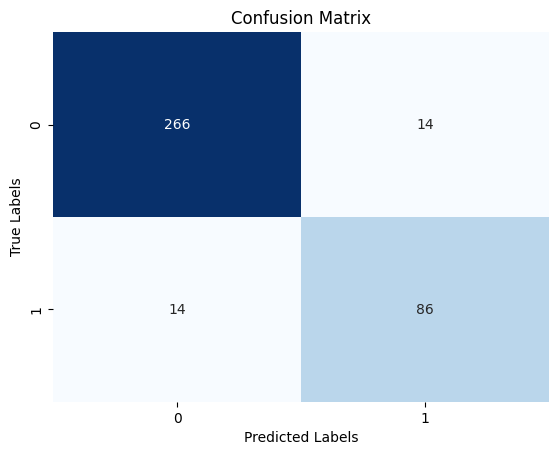


 CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       280
           1       0.86      0.86      0.86       100

    accuracy                           0.93       380
   macro avg       0.91      0.91      0.91       380
weighted avg       0.93      0.93      0.93       380



In [79]:
# plotting confusion matrix for Random forest classifier

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred_test))


**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 95% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 95% were correctly predicted as class 0.

F1-Score: 0.95

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 86% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 85% were correctly predicted as class 1.

F1-Score: 0.85

**The model performs well in predicting drivers who stayed (class 0) with high precision and recall.**

**The precision for drivers who left(class 1) is comapratively lower than recall.**

**XG BOOST CLASSIFIER**

**Tuning parameters for XG Boost**

In [80]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_model = XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, cv=10, scoring='recall')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='recall')

In [81]:
 grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

**Creating XG Boost Classifier model**

In [82]:
# Create an XGBoost classifier

xgb_clf = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, subsample=0.8)

xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
# Make predictions on the test and train data

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

In [84]:
# Evaluating the model's accuracy on train and test data

print(f'Train Accuracy: {accuracy_score(y_pred_train, y_train)}')
print(f'Test Accuracy: {accuracy_score(y_pred_test, y_test)}')

Train Accuracy: 0.9453947368421053
Test Accuracy: 0.9236842105263158


**The training accuracy is 94.5% and the test accuracy is around 92.3%.**

**ROC-AUC Curve for XG Boost Classifier**

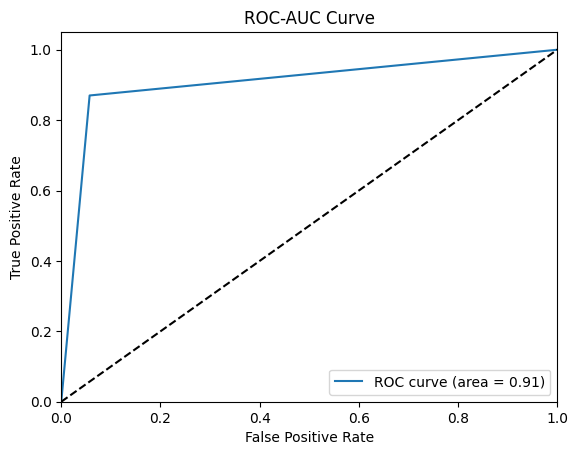

In [85]:
# Calculating ROC AUC score

roc_auc = roc_auc_score(y_test, y_pred_test)

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()


**The area under the curve for XG Boost Classifier is around 0.91.**

**Confusion matrix for XG Boosting Classifier**

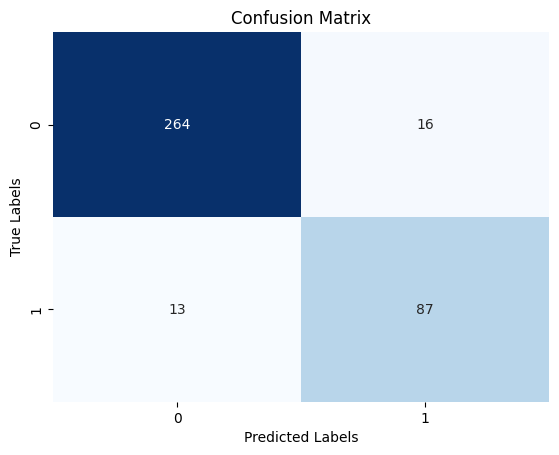


 CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       280
           1       0.84      0.87      0.86       100

    accuracy                           0.92       380
   macro avg       0.90      0.91      0.90       380
weighted avg       0.92      0.92      0.92       380



In [86]:
# plotting confusion matrix for Random forest classifier

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred_test))


**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 95% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 94% were correctly predicted as class 0.

F1-Score: 0.95

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 84% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 87% were correctly predicted as class 1.

F1-Score: 0.86

**The model performs well in predicting drivers who stayed (class 0) with high precision and recall.**

**The precision and recall for drivers who left(class 1) is comapratively lower than precision and recall accuracy for class 0.**

# TREATING CLASS IMBALANCE

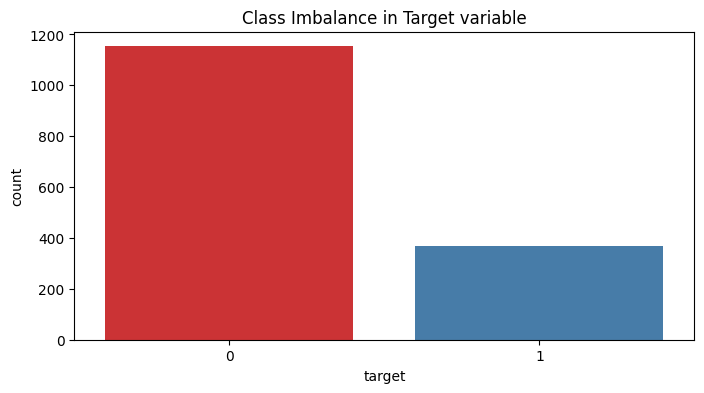

In [87]:
# distribution in target variable

plt.figure(figsize=(8,4))
sns.countplot(x=y_train,palette='Set1')
plt.title('Class Imbalance in Target variable')
plt.show()

In [88]:
# percentage of both the class of target

(y_train.value_counts()*100)/len(y_train)

,count
target,
0,75.855263
1,24.144737


**There is a huge imbalance in both the classes.**

In [89]:
# treating imbalance

smot = SMOTE(random_state=42)
X_train_smot, y_train_smot = smot.fit_resample(X_train,y_train.ravel())

# MODEL CREATION AFTER HANDLING CLASS IMBALANCE

**RANDOM FOREST CLASSIFIER**

In [90]:
# tuning the classifier to get the best parameters

rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators':list(range(10,20)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
 }

clf = GridSearchCV(rf_model,param_grid,cv=10,scoring='recall')
clf.fit(X_train_smot,y_train_smot)

clf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 13}

In [91]:
# creating RF classifier and printing accuracy

rf_clf = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='sqrt',n_estimators=14)
rf_clf.fit(X_train_smot,y_train_smot)

y_pred_train = rf_clf.predict(X_train_smot)
y_pred_test = rf_clf.predict(X_test)

print(f'Train Accuracy: {accuracy_score(y_pred_train, y_train_smot)}')
print(f'Test Accuracy: {accuracy_score(y_pred_test, y_test)}')

Train Accuracy: 0.9436253252385083
Test Accuracy: 0.8921052631578947


**The train score of RF classifier after imbalance handling is 93% and the test score is 88%.**

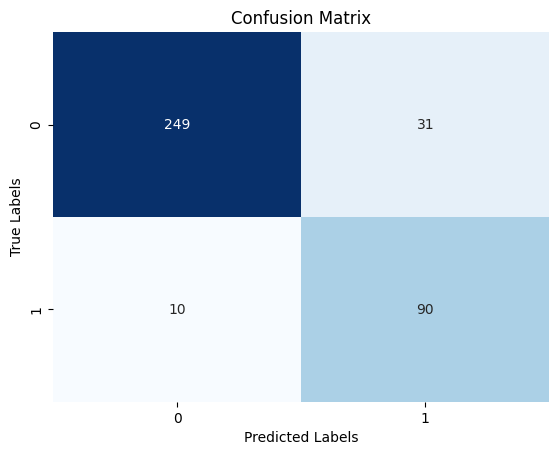


 CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       280
           1       0.74      0.90      0.81       100

    accuracy                           0.89       380
   macro avg       0.85      0.89      0.87       380
weighted avg       0.90      0.89      0.90       380



In [92]:
# confusion matrix and classification report for RF Classifier

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred_test))

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 96% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 89% were correctly predicted as class 0.

F1-Score: 0.92

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 74% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 89% were correctly predicted as class 1.

F1-Score: 0.81


**The model performs well in predicting drivers who stayed (class 0) with high precision and recall.**

**However, for drivers who left (class 1), precision is lower as compared to recall.**

**GRADIENT BOOSTING CLASSIFIER**

In [93]:
# creating GB Classifier and predicting on test and train data

gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train_smot, y_train_smot)

y_pred_train = gb_clf.predict(X_train_smot)
y_pred_test =gb_clf.predict(X_test)

print(f'Train Accuracy: {accuracy_score(y_pred_train, y_train_smot)}')
print(f'Test Accuracy: {accuracy_score(y_pred_test, y_test)}')


Train Accuracy: 0.9449262792714658
Test Accuracy: 0.8921052631578947


**The training accuracy comes out to be 94% and the test accuracy is around 89.2%**

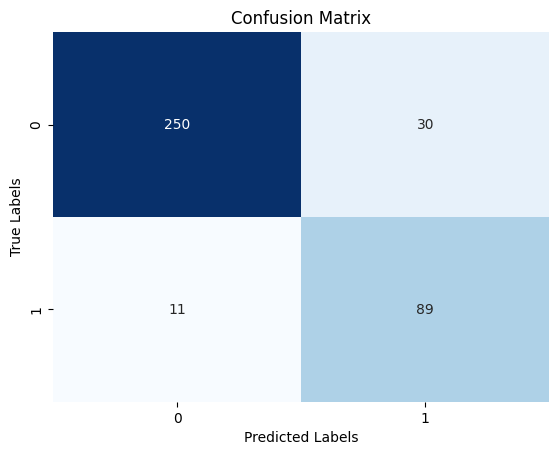


 CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       280
           1       0.75      0.89      0.81       100

    accuracy                           0.89       380
   macro avg       0.85      0.89      0.87       380
weighted avg       0.90      0.89      0.89       380



In [94]:
# confusion matrix and classification report for GB classifier

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred_test))

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 96% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 89% were correctly predicted as class 0.

F1-Score: 0.92

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 75% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 89% were correctly predicted as class 1.

F1-Score: 0.81


**The model performs well in predicting drivers who stayed (class 0) with high precision and recall.**

**However, for drivers who left (class 1), precision is lower than the recall, and the f1-score is also less.**

**XG BOOST CLASSIFIER**

In [95]:
# Create an XGBoost classifier and predicting for train and test data

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_smot, y_train_smot)

# predicting the model
y_pred_train = xgb_clf.predict(X_train_smot)
y_pred_test = xgb_clf.predict(X_test)

# testing accuracy
print(f'Train Accuracy: {accuracy_score(y_pred_train, y_train_smot)}')
print(f'Test Accuracy: {accuracy_score(y_pred_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.8947368421052632


**The train accuracy comes out to be 100%, whereas the test accuracy is around 89%.**

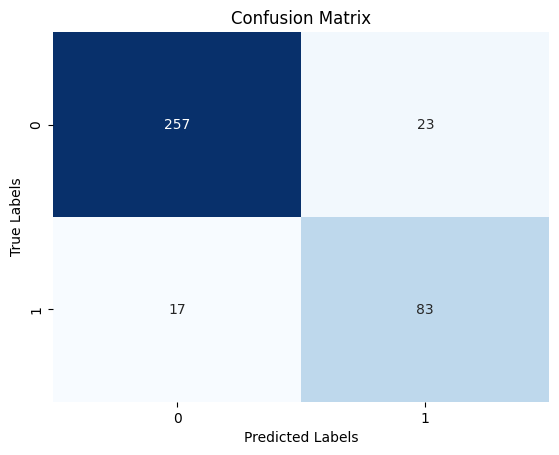


 CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       280
           1       0.78      0.83      0.81       100

    accuracy                           0.89       380
   macro avg       0.86      0.87      0.87       380
weighted avg       0.90      0.89      0.90       380



In [96]:
# confusion matrix and classification report for XG boost classifier

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n CLASSIFICATION REPORT\n")
print(classification_report(y_test, y_pred_test))

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 94% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 92% were correctly predicted as class 0.

F1-Score: 0.93

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 78% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 83% were correctly predicted as class 1.

F1-Score: 0.81


**The model performs well in predicting drivers who stayed (class 0) with high precision and recall.**

**However, for drivers who left (class 1), precision is lower than the recall, and the f1-score is satisfactory.**

# INSIGHTS

**There are 816 drivers whose Quarterly Rating has increased.**

**There are only 43 drivers whose income has increased.**

**Number of drivers leaving the company is almost half the number of drivers not leaving the company.**

**Maximum drivers have designation 1 at the time of joining.**

**Mostly the drivers have a Grade 2 at the time of reporting.**

**The education level of all the three categories of drivers, i.e., 0 for 10+ ,1 for 12+ ,2 for graduate, is almost equal.**

**The maximum quarterly rating of drivers is 1.**

**The dominating gender of drivers is Male.**

**maximum number of drivers joining is in the mid-year as compared to year ending and beginning.**

**More drivers are joining the company with increase in year.**

**The monthly reportings of most of the drivers are around 1 to 5.**

**Most of the drivers are from the city C20, rest all the cities have almost uniform number of drivers.**

**The median salary of the drivers is around 2,27,000.**

**Most of the drivers have the salary around 50,000.**

**The income of Males is slighly greater than Females.**

**The income with respect to Education Level is roughly equal.**

**Drivers having Grade 3 earn the most.**

**Income of drivers having Joining Destination as 1 is maximum.**

**Drivers whose Quarterly Rating increases earn more than drivers whose ratings dont increase.**

**Around 2% of the drivers get growth in the annual Income.**

**The target is directly related to Total Business value, Income and Monthly Reportings.**

**Monthly Reportings are very highly correlated with Income and Total Business Value and Quarterly rating.**

**Grade and Joining Destination are also very highly correlated.**


**INSIGHTS BASED ON ENSEMBLE MODELS(WITHOUT SMOTE)**

**Random Forest Classifier**

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 91% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 97% were correctly predicted as class 0.

F1-Score: 0.94

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 91% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 73% were correctly predicted as class 1.

F1-Score: 0.81

**GRADIENT BOOSTING CLASSIFIER**

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 95% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 95% were correctly predicted as class 0.

F1-Score: 0.95

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 86% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 85% were correctly predicted as class 1.

F1-Score: 0.85

**XG BOOST CLASSIFIER**

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 95% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 94% were correctly predicted as class 0.

F1-Score: 0.95

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 84% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 87% were correctly predicted as class 1.

F1-Score: 0.86

**INSIGHTS BASED ON ENSEMBLE MODELS(WITH SMOTE)**

**RANDOM FOREST CLASSIFIER**

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 96% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 89% were correctly predicted as class 0.

F1-Score: 0.92

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 74% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 89% were correctly predicted as class 1.

F1-Score: 0.81

**GRADIENT BOOSTING CLASSIFIER**

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 96% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 89% were correctly predicted as class 0.

F1-Score: 0.92

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 75% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 89% were correctly predicted as class 1.

F1-Score: 0.81

**XG BOOST CLASSIFIER**

**Class 0 (drivers who stayed):**

Precision:
Out of all instances predicted as class 0, 94% were actually class 0.

Recall (Sensitivity):
Out of all actual class 0 instances, 92% were correctly predicted as class 0.

F1-Score: 0.93

**Class 1 (drivers who left):**

Precision:
Out of all instances predicted as class 1, 78% were actually class 1.

Recall (Sensitivity):
Out of all actual class 1 instances, 83% were correctly predicted as class 1.

F1-Score: 0.81

**After handling the class imbalance, the accuracy is not improved much.**

**The maximum score is given by XG Boost classifier.**

**Scores of Random Forest and Gradient Boosting are also acceptable.**





# RECOMMENDATIONS

**Quarterly Rating Improvement:**

For the 816 drivers whose Quarterly Rating has increased, consider recognizing their progress and providing additional training or incentives to maintain this positive trend.

**Income Growth:**

Address the issue of only 43 drivers experiencing an increase in income. Evaluate the reasons behind this disparity and explore opportunities for salary adjustments or performance-based bonuses to motivate all drivers.

**Driver Retention:**

Since the number of drivers leaving the company is almost half the number of drivers staying, focus on retaining existing drivers.

**Joining Destination and Designation:**

Given that most drivers join with designation 1, ensure that their initial training and onboarding are comprehensive.
Monitor the performance of drivers with different designations to identify any patterns or areas for improvement.

**Education Level and Income:**

Although education levels are similar across categories (10+, 12+, graduate), explore whether additional education or specialized training can lead to higher income.

**Salary Distribution and Gender:**

Address the slight disparity in income between male and female drivers. Ensure equal pay for equal work and promote a gender-inclusive work environment.

**Grade and Income:**

Drivers with Grade 3 earn the most. Investigate the factors contributing to their success (e.g., experience, performance metrics) and apply those insights to other drivers.

**Joining Trends and Yearly Increase:**

Leverage the mid-year influx of new drivers by optimizing training resources during this period.

**Monthly Reportings and Correlations:**

Since monthly reportings highly correlate with income and total business value, emphasize accurate and timely reporting.
Encourage drivers to maintain consistent reporting practices and provide necessary tools for efficient reporting.

**City Distribution:**

Focus on city C20, which has the highest number of drivers.
Explore opportunities to balance driver distribution across other cities.

**Target and Business Metrics:**

Recognize the direct relationship between targets, income, and monthly reportings. Align driver goals with overall business objectives.

**Quarterly Rating Impact:**

Drivers whose ratings increase earn more. Invest in training programs to enhance driver performance and encourage continuous improvement.

**Annual Income Growth:**

While only 2% experience annual income growth, explore personalized development plans for these drivers.

**Correlations:**

Leverage the strong correlations between monthly reportings, income, and total business value. Optimize resource allocation based on these factors.

**RECOMMENDATIONS ON ENSEMBLE MODELS**

**WITHOUT SMOTE:**

**Random Forest Classifier:**

Achieved high precision (91%) and recall (97%) for predicting drivers who stayed, but lower recall (73%) for predicting drivers who left.

**Recommendation:**

Improving the model's ability to identify drivers who left without compromising precision.

**Gradient Boosting Classifier:**

Demonstrated high precision (86%) and recall (85%) for predicting drivers who left, with decent performance overall.

**Recommendation:**

Continuous monitoring and potential further tuning to enhance performance.

**XG Boost Classifier:**

 Maintained high precision and recall for both classes, suggesting good performance.

**Recommendation:**

Maintaining model performance and monitoring its behavior on new data.

**WITH SMOTE:**

**Random Forest Classifier:**

Achieved high precision (96%) for predicting drivers who stayed but showed lower precision (74%) for predicting drivers who left.

**Recommendation:**

Focusing on improving precision for predicting drivers who left.

**Gradient Boosting Classifier:**

Displayed high precision (75%) for predicting drivers who left but maintained good recall (89%) for both classes.

**Recommendation:**

Parallels that of Random Forest Classifier, emphasizing precision improvement for predicting drivers who left.

**XG Boost Classifier:**

Maintained good precision (78%) and recall (83%) for predicting drivers who left, while maintaining high performance for predicting drivers who stayed.

**Recommendation:**

Ongoing monitoring and potential tuning should be done to enhance overall performance.

**Save the model for deployment**

In [97]:
# import pickle
# pickle_out = open ("rf_model.pkl", "wb")
# pickle.dump(rf_model, pickle_out)
# pickle_out.close()

In [98]:
import joblib
joblib.dump(model, 'model.pkl')

NameError: name 'model' is not defined